In [89]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [35]:
df=pd.read_csv("D://healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [37]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [43]:
column,row=df.shape
print("Total column:",column)
print("Total row:",row)

Total column: 5110
Total row: 12


In [45]:
categorial=df.select_dtypes(include=["object"]).keys()
print(categorial)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [47]:
quantitative=df.select_dtypes(include=["int64","float64"]).keys()
print(quantitative)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [49]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [53]:
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [55]:
#Checking for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [57]:
#replacing the missing values with the most frequent value
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_19280\948015180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)


In [59]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
#Check values and their count in the columns
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [65]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_19280\3919654123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_19280\3919654123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_marri

<Axes: >

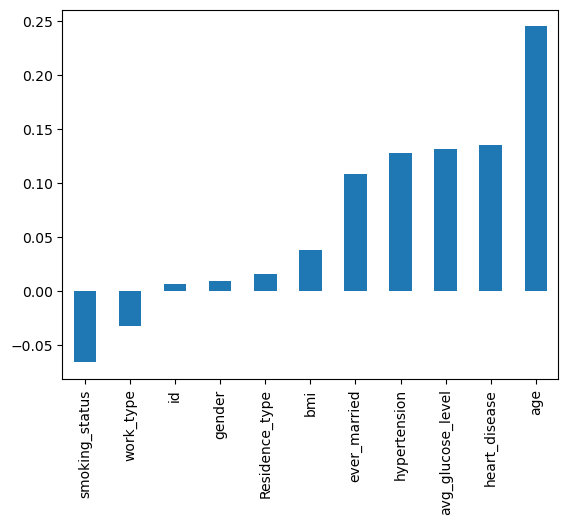

In [67]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<Axes: >

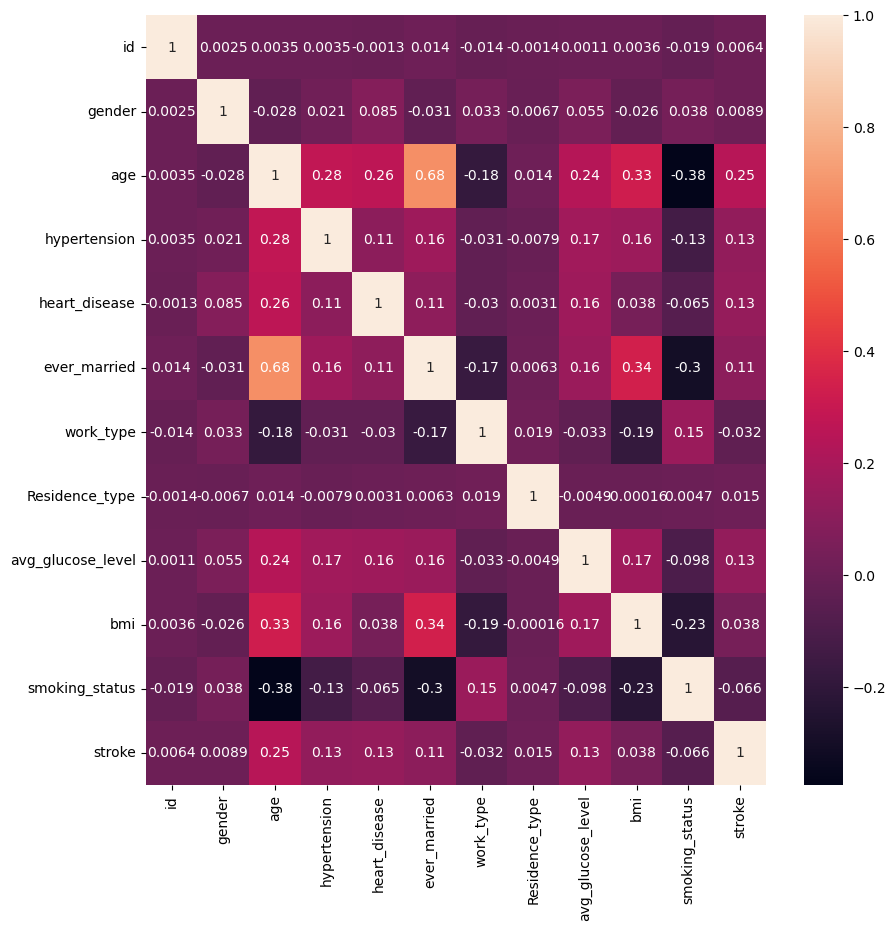

In [71]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(), annot=True)

<Axes: xlabel='gender', ylabel='count'>

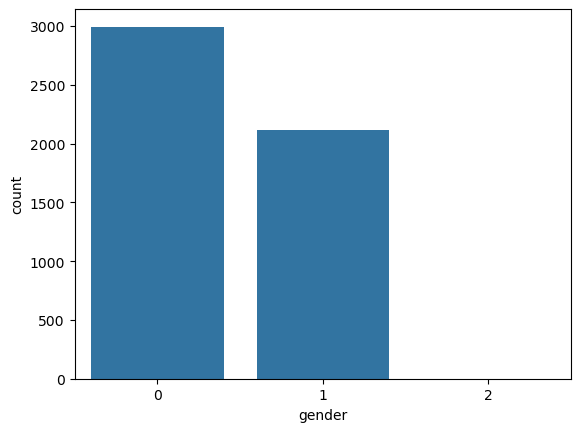

In [75]:
sb.countplot(x = 'gender', data = df)

In [79]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,4,0,1,1,0,1,228.69,36.6,0,1
1,51676,0,4,0,0,1,1,0,202.21,28.7,1,1
2,31112,1,4,0,1,1,0,0,105.92,32.5,1,1
3,60182,0,3,0,0,1,0,1,171.23,34.4,2,1
4,1665,0,4,1,0,1,1,0,174.12,24.0,1,1


<Axes: xlabel='Residence_type', ylabel='count'>

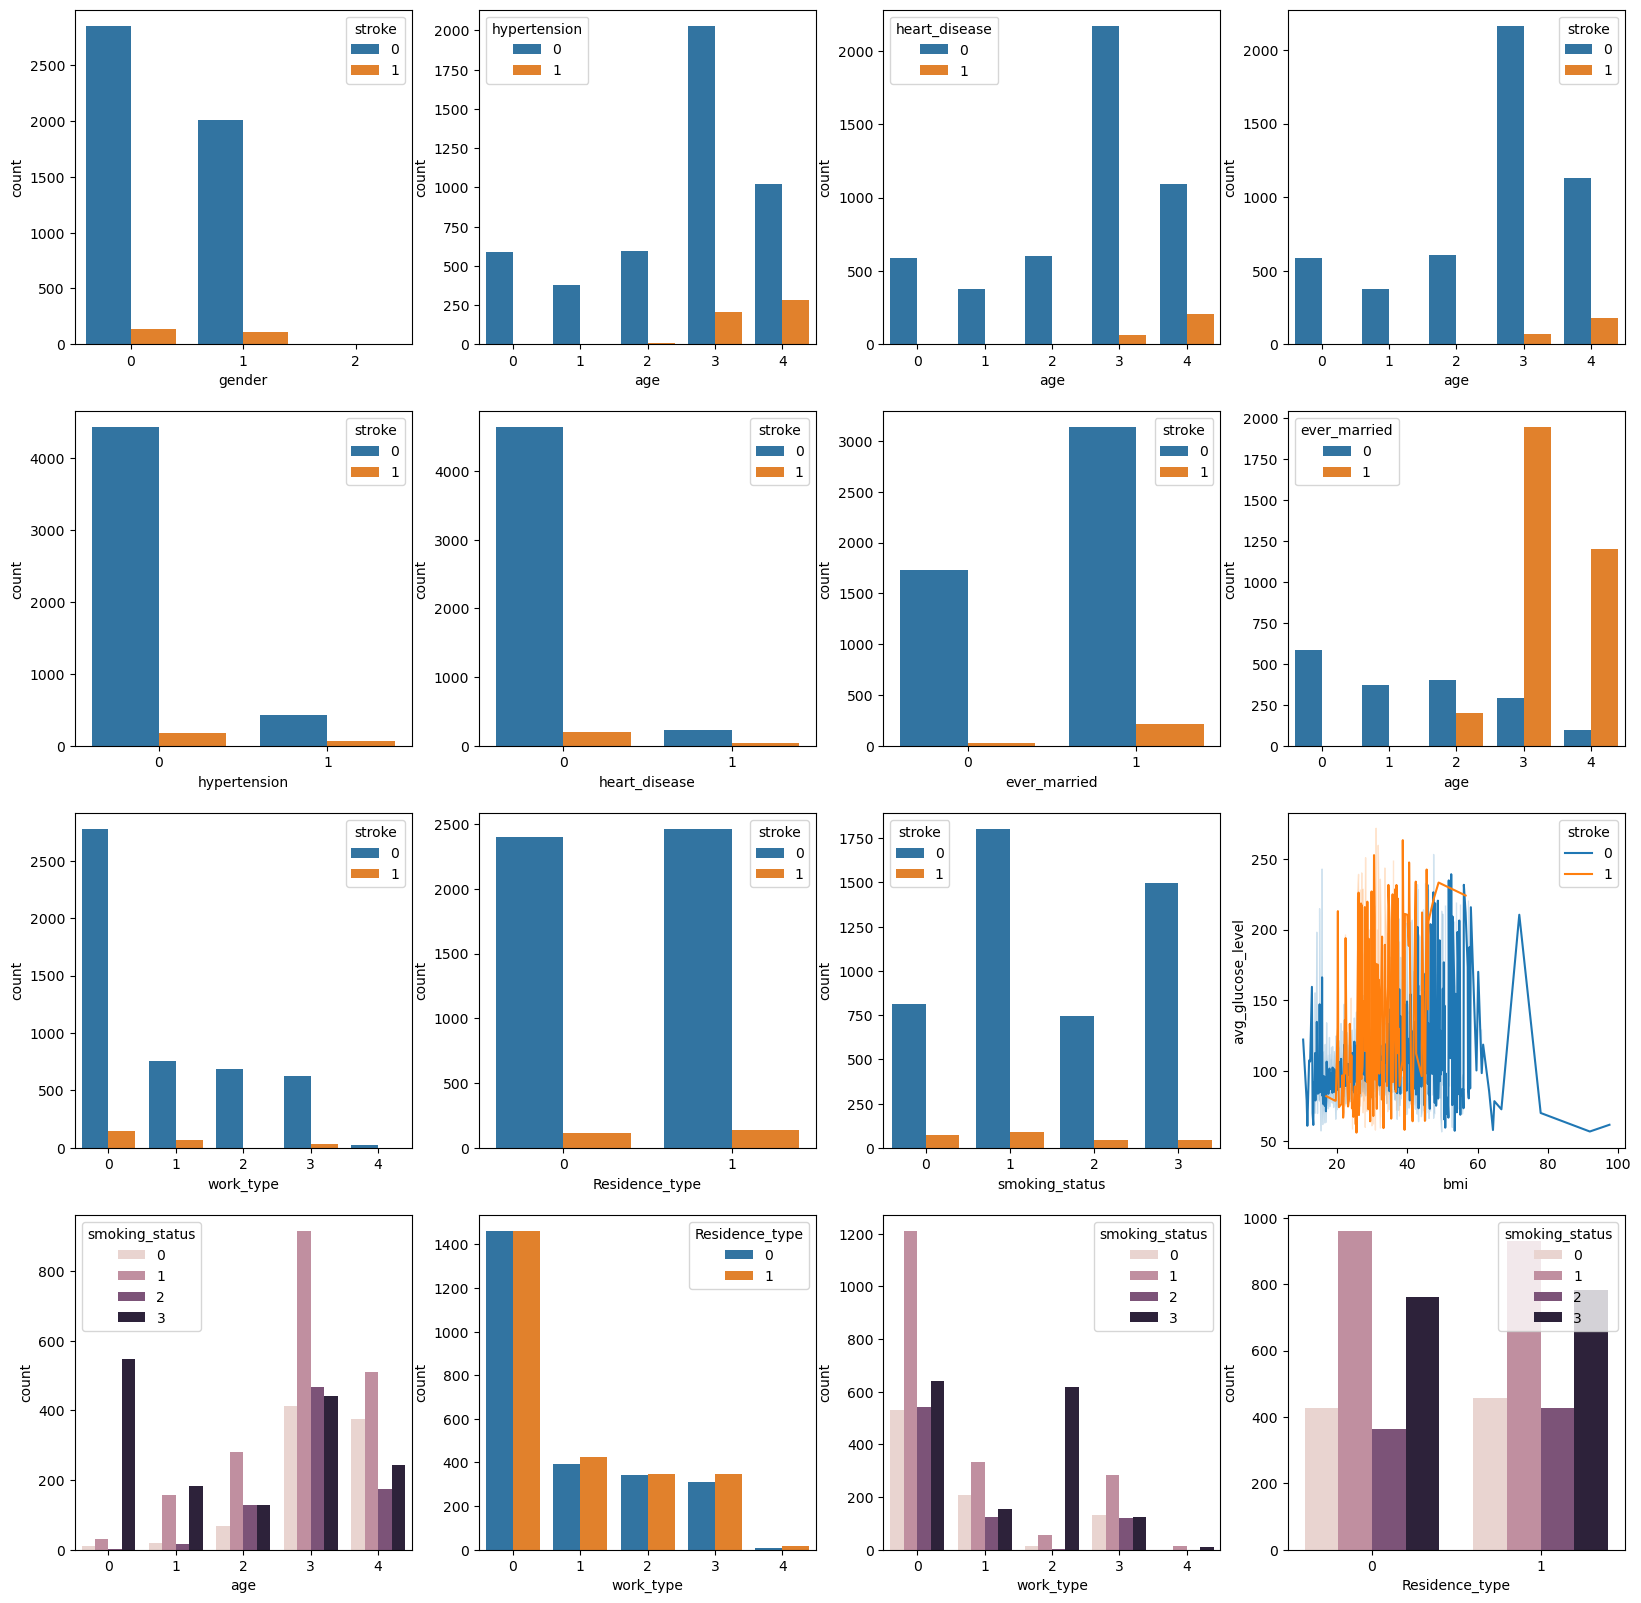

In [81]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sb.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sb.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sb.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sb.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sb.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sb.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sb.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sb.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sb.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sb.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sb.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sb.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sb.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sb.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sb.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sb.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

In [85]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)

In [87]:
### Logistic Regression

In [111]:
#stadardizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
#training the logistic regression model
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

#making prediction on the testing set
lr_pred = log_reg.predict(X_test)

#Evaluting the model
accuracy = accuracy_score(y_test,lr_pred)
print("Accuracy:" ,accuracy)

Accuracy: 0.9393346379647749


In [115]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [117]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9393346379647749

In [119]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

In [121]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [123]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8972602739726028

In [125]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.8972602739726028

In [127]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [129]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9393346379647749

In [131]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9393346379647749